## 워드 임베딩(Word Embedding)

단어의 의미를 벡터화시킬 수 있는 워드투벡터, 글로브를 사용해보자


#### 1.희소표현

표현하고자 하는 단어의 인덱스의 값만 1이고, 나머지 인덱스에는 전부 0으로 표현되는 벡터 표현방법

즉, 원 핫 벡터가 희소 벡터

문제점은 단어의 개수가 늘어나면 벡터의 차원이 한없이 커진다는 점!

예를 들어 단어가 10000개 있고 강아지란 단어의 인덱스가 5였다면 원 핫 벡터는

Ex) 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0]  이 때 1 뒤의 0의 수는 9995개. 이렇게 표현됐다.

--> 공간적 낭비를 불러일으킨다. 

뿐만 아니라, 원-핫 벡터는 단어의 의미를 담지 못한다는 단점이 있다.


#### 2.밀집 표현

사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춥니다! (희소 벡터와 다른 점)

이 과정에서 더 이상 0과 1만 가진 값이 아니라 실수값을 가지게 된다.

Ex) 강아지 = [0.2 1.8 1.1 -2.1 1.1 2.8 ... 중략 ...]  이 벡터의 차원은 128

이 경우 벡터의 차원이 조밀해졌다고 하여 밀집 벡터라고한다.

#### 3. 워드 임베딩

단어를 밀집 벡터의 형태로 표현하는 방법을 워드 임베딩(word embedding) 이라고 한다. 이 밀집 벡터를 워드 임베딩 과정을 통해 나온 결과라고 하여 임베딩 벡터라고도 한다.

워드 임베딩 방법론으로는 LSA, Word2Vec, FastText, Glove 등이 있습니다. 


## 워드투벡터(Word2Vec)

단어간 유사도를 알 수 있는 워드투벡터!! (원 핫 벡터와 다르다.)

단어들로 더하기, 빼기 연산을 할 수 있다.

고양이 + 애교 = 강아지

한국 - 서울 + 도쿄 = 일본

박찬호 - 야구 + 축구 = 호나우두

#### 희소 표현은 단어간 유사성을 표현할 수 없다는 단점이 있었고, 이를 위한 대안으로 단어의 '의미'를 다차원 공간에 벡터화하는 방법을 찾았다. --> 분산 표현(distributed representation)방식 

단어의 유사도를 벡터화하는 작업은 워드 임베딩 작업에 속하기 때문에 임베딩 벡터, 저차원을 가지므로 밀집 벡터에 속함!


### 분산 표현

'비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다' 라는 가정을 가진다.

강아지란 단어는 귀엽다, 예쁘다, 애교 등의 단어가 주로 함께 등장하는데 분포 가설에 다라 저런 내용을 가진 텍스트를 벡터화한다면 저 단어들은 의미적으로 가까운 단어가 된다.분산 표현은 분포 가설을 이용하여 단어들의 셋을 학습하고, 벡터에 단어의 의미를 여러 차원에 분산하여 표현합니다.

원 핫 벡터와의 차이점을 살펴보자

#####  원-핫 벡터

Ex) 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0]

1이란 값 뒤에는 0이 9,995개가 있는 벡터 ( 고 차원 )
#####  분산 표현

Word2Vec로 임베딩 된 벡터는 굳이 벡터의 차원이 단어 집합의 크기가 될 필요가 없다.

Ex) 강아지 = [0.2 0.3 0.5 0.7 0.2 ... 중략 ... 0.2]

저차원에 단어의 의미를 여러 차원에다가 분산하여 표현합니다. 이런 표현 방법을 사용하면 단어 간 유사도를 계산할 수 있습니다.

NNLM,RLLNM 등이 있으나 속도를 대폭 개선시킨 Word2Vec 을 쓰자.

## CBOW(Continuous Bag of Words)

Word2Vec은 CBOW와 Skip-Gram 두 가지 방식이 있다.

###### CBOW는 주변에 있는 단어들을 가지고 중간에 있는 단어들을 예측하는것

###### Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법 ( 둘이 비슷해!! )

CBOW를 먼저 살펴보자


#### 예문 : "The fat cat sat on the mat"


 {"The", "fat", "cat", "on", "the", "mat"}으로부터 sat을 예측하는 것은 CBOW가 하는 일이다.
 
 예측해야되는 단어 sat : 중심 단어
 
 예측에 사용되는 단어 : 주변 단어
 
 앞,뒤로 몇 개의 단어를 볼지를 결정했다면 이 범위를 윈도우(window)라고한다. 예를 들어 윈도우 크기가 n이라고 하면 중심 단어를 예측하기 위해 참고하려고 하는 주변 단어의 개수는 2n이 된다. 
 
 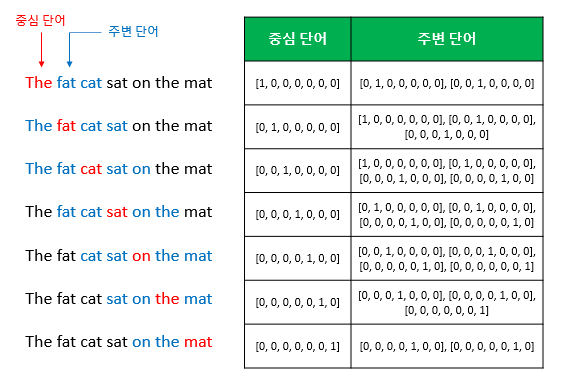
 
 윈도우 크기를 정했다면 , 윈도우를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터 셋을 만들수 있다.--> 슬라이딩 윈도우
 
 
 input으로 주변 단어가 들어가며 output으로는 중심단어가 된다.
 
 딥러닝이 아니다. 왜냐하면 은닉층이 1개 밖에 없어서!!
 


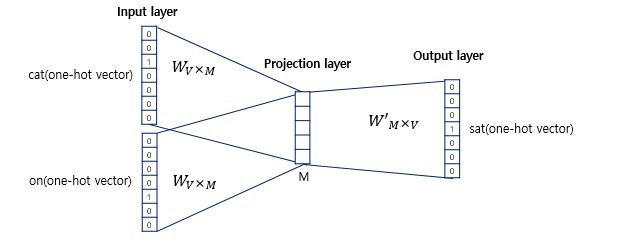



훈련 전에 가중치 행렬 W와 W'은 대게 굉장히 작은 랜덤 값을 가지게 된다.

CBOW는 주변 단어로 중심 단어를 더 정확히 맞추기 위해 계속해서 이 W와 W'를 학습해가는 구조이다.

W 행렬의 i번째 행을 그대로 읽어오는 것과 동일해서 lookup table이라고도 한다.

CBOW의 목적은 W와 W'를 잘 훈련시키는 것이다. 

사실상 W의 각 행벡터가 Word2Vec을 수행한 후의 각 단어의 M차원의 크기를 갖는 임베딩 벡터들이다.

각 주변 단어의 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 결과 벡터들은 투사층에서 만나 이 벡터들의 평균인 벡터를 구하게 된다.

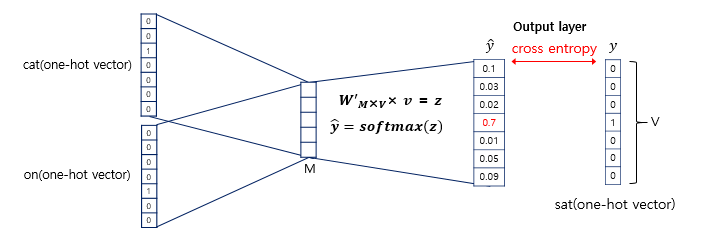





이렇게 구해진 평균 벡터는 W' 가중치 행렬과 곱해진다.

곱셈의 결과로 원-핫 벡터들과 차원이 V로 동일한 벡터가 나온다.  

이 벡터에 CBOW는 소프트맥스(softmax) 함수를 취하는데, 소프트맥스 함수로 인한 출력값은 0과 1사이의 실수로, 각 원소의 총 합은 1이 되는 상태로 바뀝니다. 이렇게 나온 벡터를 스코어 벡터라고 한다.

스코어 벡터의 j 번째 인덱스는 j번째 단어가 중심 단어일 확률을 나타낸다. 

이 스코어 벡터는 우리가 실제로 값을 알고있는 벡터인 중심 단어 원-핫 벡터의 값에 가까워져야 한다.

중심 단어를 y , 스코어 벡터를 y' 라고 했을 때 이 두 벡터값의 오차를 줄이기 위해 CBOW는 손실 함수로 cross-entropy를 사용한다.
최소화시켜야됨!!

## Skip-gram

중심 단어에서 주변 단어를 예측한다.

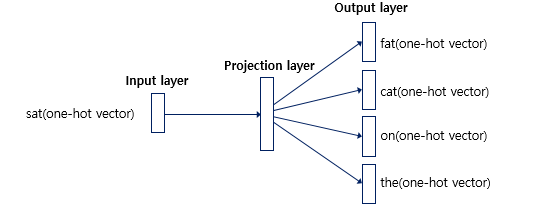

# 영어/한국어 Word2Vec 실습

## 1. 영어 Word2Vec 만들기



In [1]:
import nltk
nltk.download('punkt')
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jeong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

# 훈련 데이터를 다운도르한다.
# 훈련 데이터가 xml 문법으로 작성되어 있어 자연어를 얻기 위해서는 전처리가 필요하다. 

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x2db8a3d36c8>)

In [3]:
# 훈련 데이터를 전처리한다.

targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [4]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [5]:
# 확인 차  샘플 3개만 출력해보자

for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [7]:
# Word2Vec 훈련시키기

from gensim.models import Word2Vec
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)
# size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
# window = 컨텍스트 윈도우 크기
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram.


In [8]:
# 유사한 단어들을 출력해보자

model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8584775924682617), ('guy', 0.8095221519470215), ('lady', 0.7806198596954346), ('boy', 0.7757848501205444), ('girl', 0.7747296094894409), ('soldier', 0.747393012046814), ('kid', 0.7332973480224609), ('gentleman', 0.7224678993225098), ('writer', 0.6627483367919922), ('son', 0.6602475047111511)]


In [9]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [10]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8584775924682617), ('guy', 0.8095221519470215), ('lady', 0.7806198596954346), ('boy', 0.7757848501205444), ('girl', 0.7747296094894409), ('soldier', 0.747393012046814), ('kid', 0.7332973480224609), ('gentleman', 0.7224678993225098), ('writer', 0.6627483367919922), ('son', 0.6602475047111511)]


## 2. 한국어 Word2Vec 만들기(네이버 영화 리뷰)


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [12]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
train_data = pd.read_table('ratings.txt')
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [13]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [14]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [15]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [16]:
print(len(train_data)) # 리뷰 개수 출력


199992


In [17]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [18]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

In [ ]:
print(model.wv.most_similar("최민식"))

# 사전 훈련된 Word2Vec 임베딩

자연어 처리 작업을 할때, 케라스의 Embedding()를 사용하여 갖고 있는 훈련 데이터로부터 처음부터 임베딩 벡터를 훈련시키기도 하지만,

위키피디아 등의 방대한 데이터로 사전에 훈련된 워드 임베딩(pre-trained word embedding vector)를 가지고 와서 해당 벡터들의 값을 원하는 작업에 사용 할 수도 있습니다.

예를 들어서 감성 분류 작업을 하는데 훈련 데이터의 양이 부족한 상황이라면, 다른 방대한 데이터를 Word2Vec이나 GloVe 등으로 사전에 학습시켜놓은 임베딩 벡터들을 가지고 와서 모델의 입력으로 사용하는 것!!이 때로는 더 좋은 성능을 얻을 수 있습니다.

